# Data Augmentation

After selecting 'happy' and 'sad' male speakers only, I came up with 320 samples only for training the model. I decided therefore to explore audio augmentation methods. <br>
Data augmentation helps to generate synthetic data from existing data such that generalisation capability of model can be improved. <br>

In [1]:
import sys
import numpy as np
import pandas as pd
import librosa
from scipy import signal
import matplotlib.pyplot as plt

### Loading data

In [2]:
sys.path.append('../')
from aux.reader import read_data

DATA_PATH = '../data/'
data_df = read_data(DATA_PATH)

filename = data_df.path[1021]
samples, sample_rate = librosa.load('../data/' + filename)

Using TensorFlow backend.


In my analysis I decided to generate synthetic data using **Pitch Shifting** and **Noise Injection**.

## 1. Pitch shifting

This augmentation is a wrapper of librosa function 'librosa.effects.pitch_shift'. It change pitch randomly.

In [3]:
def pitch(samples, sample_rate):

    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2 * (np.random.uniform())
    samples = librosa.effects.pitch_shift(
                                    samples.astype('float64'),
                                    sample_rate,
                                    n_steps=pitch_change,
                                    bins_per_octave=bins_per_octave)
    return samples

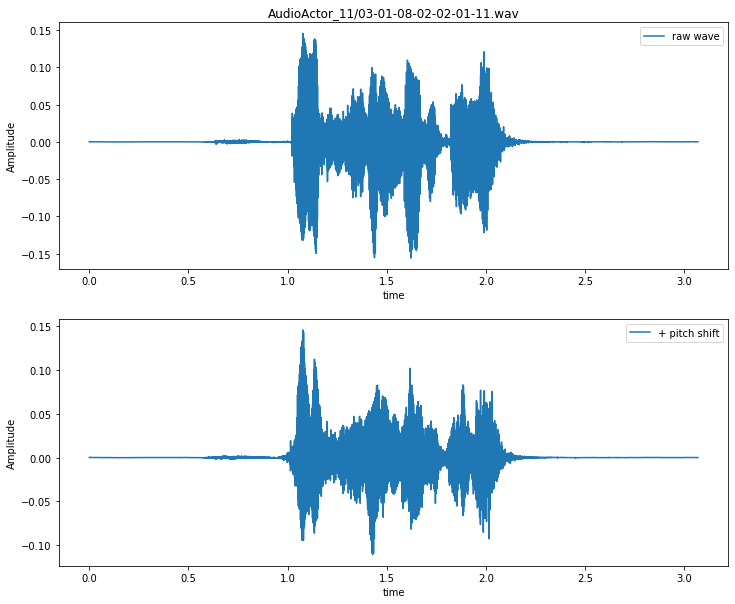

In [4]:
fig = plt.figure(figsize=(12, 10))

t = np.linspace(0, len(samples) / sample_rate, num=len(samples))

plt.subplot(211)
plt.plot(t, samples,label='raw wave')
plt.title('Audio' + filename)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(212)
plt.plot(t, pitch(samples, sample_rate=sample_rate) ,label='+ pitch shift')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

## 2. Noise Injection

Noise injection consists on simply adding some random value into data.

In [5]:
def noise(data, noise_level=0.005):
    noise_amp = noise_level * np.random.uniform() * np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

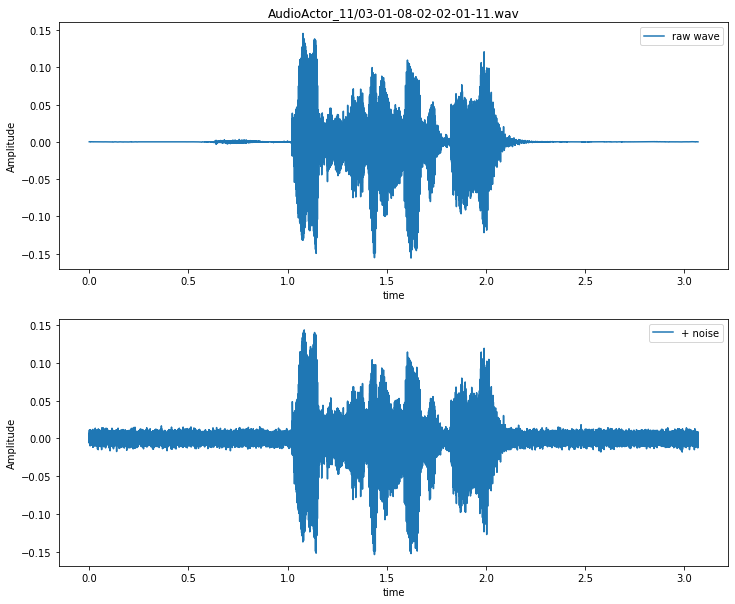

In [6]:
fig = plt.figure(figsize=(12, 10))

t = np.linspace(0, len(samples) / sample_rate, num=len(samples))

plt.subplot(211)
plt.plot(t, samples,label='raw wave')
plt.title('Audio' + filename)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(212)
plt.plot(t, noise(samples, noise_level=0.1) ,label='+ noise')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()